## From the cleaned Flight Log compilation file
Year: ***2017***

An excel combined file of all flight logs and ops has been created with additional metadata referring to the location, time, depth and quality of XBT and AXCTD data.

Location of dropsonde events

In [89]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

import pandas as pd
import os
import datetime
import numpy as np

In [111]:
fl=pd.read_excel('/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AXBTQCandEvent_Log-all.xlsx',
                 sheet_name='Spring')
fl=pd.concat([fl,pd.read_excel('/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBTQCandEvent_Log-all.xlsx',
                 sheet_name='Spring')])

### Temperature Profiles for each Region of interest

In [127]:
#2018
source_dir_2018 = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_data/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir_2018)) for f in fn if 'dta' in f]
#.clean.dta for clean files

In [128]:
#2017
source_dir_2017 = '/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/'

source_file = source_file + [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir_2017)) for f in fn if 'dta' in f]
#.clean.dta for clean files

In [129]:
dfs = {}
for i,filename in enumerate(sorted(source_file)):
    try:
        header = pd.read_csv(filename,nrows=4,header=None)
        
        #parse date in header to add delta-t in columns to
        sd = header[0][1].split('= ')[-1].split('.')
        nofrag, frag = header[0][2].split('= ')[-1].split('.')
        st = datetime.datetime.strptime(sd[0] + ' ' + nofrag,'%Y/%m/%d %H:%M:%S')
        st = st.replace(microsecond=int(frag))
        
        columns = ['Time','Depth','Frequency','DegreeC','DegreeF']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='******')
        temp_data['DateTime'] = [st +datetime.timedelta(seconds=x[1]['Time']) for x in temp_data.iterrows()]
        temp_data = temp_data.set_index(pd.DatetimeIndex(temp_data['DateTime']))
        dfs.update({filename:temp_data})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue
    except KeyError:
        columns = ['Frame#','Data','CRC','Depth','Temp','Cond','Salinity']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='*****')
        dfs.update({filename:temp_data})
        print(filename)    

/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00002.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00002.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00003.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00003.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00000.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00000.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00001.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00001.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170525/AX_ocean_probes/log00000.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170525/AX_ocean_probes/log00

6     AH20170519/AX_ocean_profiles/log00002.clean.dta
23      AH20170522/AX_ocean_probes/log00000.clean.dta
30      AH20170525/AX_ocean_probes/log00000.clean.dta
38       AH20170529/AX_ocean_probe/log00000.clean.dta
8                    AXBT_20180525/log00003.clean.dta
26                   AXBT_20180527/log00001.clean.dta
27                   AXBT_20180527/log00002.clean.dta
29                   AXBT_20180527/log00003.clean.dta
41                   AXBT_20180529/log00003.clean.dta
Name: Filename_clean, dtype: object
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00002.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00000.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170525/AX_ocean_probes/log00000.clean.dta
/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170529/AX_ocean_probe/log00000.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_dat

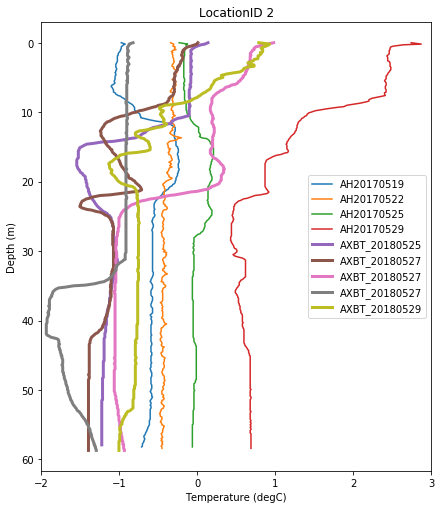

In [137]:
for count in range(2,3,1):
    fp = fl['Filename_clean'][fl['LocationID'] == count]
    fig, ax = plt.subplots(figsize=(7,8.25))
    print(fp)
    for i,ds in enumerate(fp):
        try:
            dfp = source_dir_2017+ds
            df = dfs[dfp]
            print(dfp)
            ax.plot(df['(C)'],df['Depth'],label=ds.split('/')[-3:][0])
        except:
            try:
                dfp = source_dir_2018+ds
                df = dfs[dfp]
                print(dfp)
                ax.plot(df['(C)'],df['Depth'],label=ds.split('/')[-3:][0],linewidth=3)
            except:
                print("didn't read {}".format(dfp))

    ax.set_xlim([-2,3])
    plt.ylabel('Depth (m)')
    plt.xlabel('Temperature (degC)')    
    ax.invert_yaxis()
    plt.legend(loc='right')
    plt.title("LocationID {}".format(count))
    fig.savefig("LocationID_{}".format(count)+".png",dpi=300, bbox_inches='tight')